# 0. Libraries

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AnjaF\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# 1. Read the File

In [113]:
file1 = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [114]:
file1.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# 2. Select the columns: Title, Review Text, Rating, Division Name, Department Name

In [115]:
new_df = file1[['Title', 'Review Text', 'Rating', 'Division Name', 'Department Name' ]]

In [116]:
new_df.head()

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


# 3. Standardization of the header names

In [117]:
new_df.columns= new_df.columns.str.lower()

In [118]:
new_df.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [119]:
new_df.columns = new_df.columns.str.replace(" ", "_")

In [120]:
new_df.head(10)

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,General Petite,Tops
8,Flattering,I love this dress. i usually get an xs but it ...,5,General,Dresses
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,General,Dresses


# 4. EDA

In [121]:
new_df.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [122]:
new_df.shape

(23486, 5)

In [123]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review_text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division_name    23472 non-null  object
 4   department_name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


# 5. GroupBy-Function
- use the pandas groupby function to summarise the *average* rating by division and department as a new dataframe (image clothing_rating_groupby.png)

In [124]:
group_df = new_df.groupby(["division_name", "department_name"]).mean()

In [125]:
group_df.head(40)

rating
division_name  department_name          
General        Bottoms          4.268686
               Dresses          4.163003
               Jackets          4.240310
               Tops             4.148749
               Trend            3.822917
General Petite Bottoms          4.329356
               Dresses          4.133256
               Intimate         4.240343
               Jackets          4.304910
               Tops             4.216469
               Trend            3.782609
Initmates      Intimate         4.286285

# 6. Visualization with bar-chart

<AxesSubplot:ylabel='division_name,department_name'>

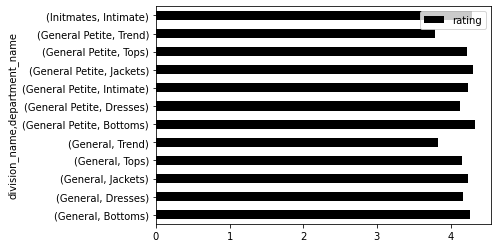

In [170]:
group_df.plot(kind='barh', color = "black")

# 7. Apply Textblob

In [127]:
testimonial = TextBlob(str(new_df.iloc[[5], 1]))
testimonial.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [128]:
testimonial = TextBlob(str(new_df.iloc[[-1], 1]))
testimonial.sentiment

Sentiment(polarity=0.5, subjectivity=0.75)

In [129]:
testimonial = TextBlob(str(new_df.iloc[[-2], 1]))
testimonial.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [130]:
testimonial = TextBlob(str(new_df.iloc[[-3], 1]))
testimonial.sentiment

Sentiment(polarity=0.3666666666666667, subjectivity=0.39999999999999997)

In [131]:
new_df.head(-3)

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
...,...,...,...,...,...
23478,Unflattering,I was surprised at the positive reviews for th...,1,General Petite,Dresses
23479,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,General Petite,Bottoms
23480,NaN,NaN,5,General Petite,Tops
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses


# 8. Apply TextBlob -> breakt out the text into sentence

In [132]:
text = new_df["review_text"]

In [133]:
text

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review_text, Length: 23486, dtype: object

In [183]:
sent1 = []

for text in new_df["review_text"]:
    blob = TextBlob(str(text))
    sent1.append(blob.sentences)

In [184]:
sent1

[[Sentence("Absolutely wonderful - silky and sexy and comfortable")],
 [Sentence("Love this dress!"),
  Sentence("it's sooo pretty."),
  Sentence("i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite."),
  Sentence("i bought a petite and am 5'8"."),
  Sentence("i love the length on me- hits just a little below the knee."),
  Sentence("would definitely be a true midi on someone who is truly petite.")],
 [Sentence("I had such high hopes for this dress and really wanted it to work for me."),
  Sentence("i initially ordered the petite small (my usual size) but i found this to be outrageously small."),
  Sentence("so small in fact that i could not zip it up!"),
  Sentence("i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers."),
  Sentence("imo, a major design flaw was the net over layer sewn

# 9. Apply Dropna
* we think the aim is to drop the NaN from the colum "review_text, because after that the number of rows will be 22.641 for the colum review_text. For the other columns the missing values stays in the DataFrame.

In [135]:
df1_null = new_df.dropna(subset=["review_text"])

In [166]:
# how many NAn stays in the DataFrame
df1_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            19675 non-null  object 
 1   review_text      22641 non-null  object 
 2   rating           22641 non-null  int64  
 3   division_name    22628 non-null  object 
 4   department_name  22628 non-null  object 
 5   polarity         22641 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [137]:
# controlling step
df1_null.head()

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


- Result: More nan remains in the DataFrame. The goal was to drop the NaN from the column "review_text". After that the number of rows of the DataFrame correspondent to 22.641 (the goal value). 

# 10. Function to create a new column with the polarity for each row

In [138]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [140]:
df1_null['polarity'] = df1_null['review_text'].apply(sentiment).apply(lambda x: x[0])

<ipython-input-140-5b968e5fe512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_null['polarity'] = df1_null['review_text'].apply(sentiment).apply(lambda x: x[0])


In [141]:
# controlling step
df1_null.head()

,title,review_text,rating,division_name,department_name,polarity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


# 11. Groupby - function -> minimum review polarity, by division and department as a new dataframe 

In [143]:
df2 =  df1_null.groupby(["division_name", "department_name"])["polarity"].min()

In [144]:
# controlling step
df2.head()

division_name  department_name
General        Bottoms           -0.533333
               Dresses           -0.916667
               Jackets           -0.750000
               Tops              -0.975000
               Trend             -0.270833
Name: polarity, dtype: float64

# 12. Visualization with bar-chart

<AxesSubplot:ylabel='division_name,department_name'>

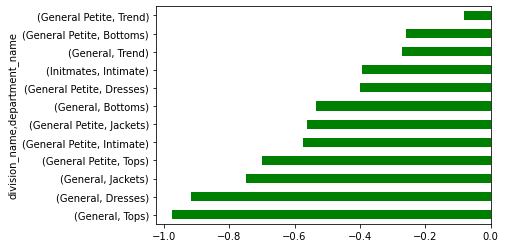

In [167]:
df2.sort_values().plot(kind='barh', color = "green")

# 13.Groupby - function -> average review polarity, by division and department as a new dataframe 

In [148]:
df3 =  df1_null.groupby(["division_name", "department_name"])["polarity"].mean()

In [149]:
#controlling step
df3.head()

division_name  department_name
General        Bottoms            0.245849
               Dresses            0.251091
               Jackets            0.237141
               Tops               0.247025
               Trend              0.203986
Name: polarity, dtype: float64

# 14. Visualization with bar-chart

<AxesSubplot:ylabel='division_name,department_name'>

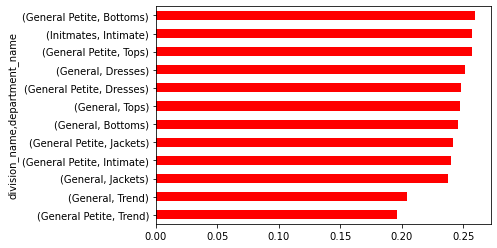

In [168]:
df3.sort_values().plot(kind = 'barh', color = "red")

# 15. Groupby - function -> summarise review polarity, by division and department as a new dataframe 

In [160]:
df4 =  df1_null.groupby(["division_name", "department_name"])["polarity"].sum()

In [161]:
df4.head()

division_name  department_name
General        Bottoms             601.592809
               Dresses             908.699695
               Jackets             147.975729
               Tops               1625.426865
               Trend                19.378700
Name: polarity, dtype: float64

# 16. Visualization with bar-chart

<AxesSubplot:ylabel='division_name,department_name'>

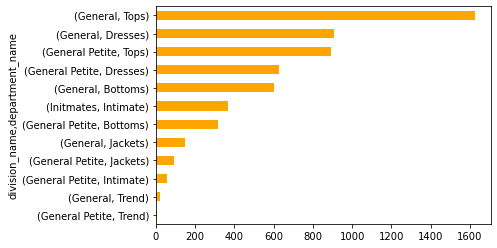

In [169]:
df4.sort_values().plot(kind = 'barh', color = "orange")